# Setup

In [2]:
import sys
from pathlib import Path

%load_ext autoreload
%autoreload 2

root_path = Path("/home/olivieri/exp").resolve()
src_path = root_path / "src"
sys.path.append(f"{str(src_path)}")

In [3]:
import pandas as pd
from glob import glob
import os

from prompter import *
from data import *

In [ ]:
# Setting
BY_MODEL = "LRASPP_MobileNet_V3"
SPLIT_BY = "non-splitted"

In [5]:
root_exp_name = "test_resized"

In [ ]:
root_exp_path = get_selected_annots_path(BY_MODEL, SPLIT_BY) / "eval_prs" / root_exp_name

exps_path = glob(f"{root_exp_path}/*")
exps_names = [os.path.splitext(os.path.basename(path))[0] for path in exps_path]
exps_names

['cmap_as_names', 'cmap_as_patches', 'cmap_as_img', 'cmap_as_rgb']

In [7]:
exps_path

['/home/olivieri/exp/data/VOCdevkit/VOC2012/MyAnnotations/by_model/LRASPP_MobileNet_V3/resized/freeform/non-splitted/eval_prs/test_resized/cmap_as_names',
 '/home/olivieri/exp/data/VOCdevkit/VOC2012/MyAnnotations/by_model/LRASPP_MobileNet_V3/resized/freeform/non-splitted/eval_prs/test_resized/cmap_as_patches',
 '/home/olivieri/exp/data/VOCdevkit/VOC2012/MyAnnotations/by_model/LRASPP_MobileNet_V3/resized/freeform/non-splitted/eval_prs/test_resized/cmap_as_img',
 '/home/olivieri/exp/data/VOCdevkit/VOC2012/MyAnnotations/by_model/LRASPP_MobileNet_V3/resized/freeform/non-splitted/eval_prs/test_resized/cmap_as_rgb']

# Prompt Assessment

In [ ]:
df_mean_pred_prs = pd.DataFrame()
df_mean_score_prs = pd.DataFrame() 

for exp_path, exp_name in zip(exps_path, exps_names):
    
    variation_paths = glob(f"{exp_path}/*.jsonl")
    variations_names = [os.path.splitext(os.path.basename(path))[0] for path in variation_paths]

    df_pred_prs = pd.DataFrame()
    df_score_prs = pd.DataFrame() 

    for variation_name in variations_names:
        
        eval_prs = get_many_eval_pr(BY_MODEL, SPLIT_BY, f"{root_exp_name}/{exp_name}", variation_name, return_state=False)

        _df_all_prs = pd.DataFrame.from_dict(eval_prs, orient='index')
        _df_pred_prs = _df_all_prs["pred"].map(lambda x: x if x is None else int(x == "correct"))
        _df_score_prs = _df_all_prs["score"]
        _df_reason_prs = _df_all_prs["reason"]

        df_pred_prs = pd.concat([df_pred_prs, _df_pred_prs], axis=1)
        df_score_prs = pd.concat([df_score_prs, _df_score_prs], axis=1)
    
    df_pred_prs.columns = variations_names
    df_score_prs.columns = variations_names

    df_mean_pred_prs = pd.concat([df_mean_pred_prs, df_pred_prs.mean(axis=0)], axis=1)
    df_mean_score_prs = pd.concat([df_mean_score_prs, df_score_prs.mean(axis=0)], axis=1)

df_mean_pred_prs.columns = exps_names
df_mean_score_prs.columns = exps_names


## Pred

In [10]:
display(df_mean_pred_prs[["cmap_as_patches", "cmap_as_img", "cmap_as_names", "cmap_as_rgb"]].describe().iloc[[1, 2, 3, 7]])
display(df_mean_pred_prs.mean().describe().iloc[[1, 2, 3, 7]])

,cmap_as_patches,cmap_as_img,cmap_as_names,cmap_as_rgb
mean,0.568182,0.554545,0.504545,0.518182
std,0.145384,0.180907,0.210303,0.242149
min,0.300000,0.200000,0.200000,0.150000
max,0.750000,0.750000,0.750000,0.850000


mean    0.536364
std     0.029922
min     0.504545
max     0.568182
dtype: float64

,mean,std,min,max
ArrayMasks_Imgs,0.75,0.444262,0.0,1.0
ArrayMasks_Imgs_Ovr,0.55,0.510418,0.0,1.0
ConcatMasks_NoSc_Hz,0.15,0.366348,0.0,1.0
ConcatMasks_NoSc_Vr,0.20,0.410391,0.0,1.0
ConcatMasks_Ovr_Hz,0.35,0.489360,0.0,1.0
ConcatMasks_Ovr_Vr,0.25,0.444262,0.0,1.0
ConcatMasks_Sc_Hz,0.60,0.502625,0.0,1.0
ConcatMasks_Sc_Vr,0.65,0.489360,0.0,1.0
SepMasks_NoSc,0.60,0.502625,0.0,1.0
SepMasks_Ovr,0.85,0.366348,0.0,1.0


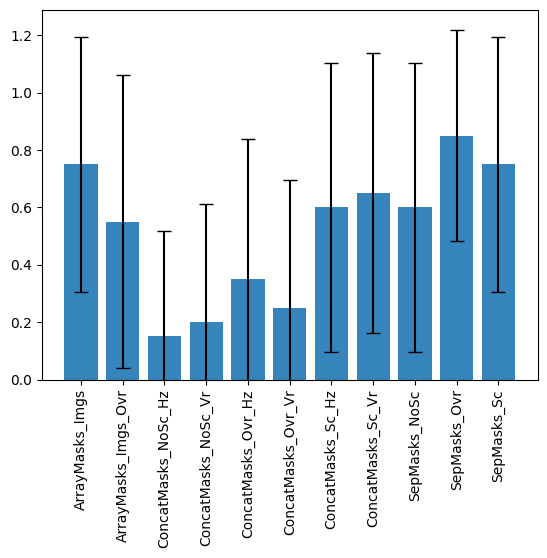

In [9]:
display(df_pred_prs.sort_index().describe().transpose().sort_index()[["mean", "std", "min", "max"]])
mean = df_pred_prs.transpose().sort_index().mean(axis=1)
std = df_pred_prs.transpose().sort_index().std(axis=1)
plt.bar(mean.index, mean, yerr=std, capsize=5, alpha=0.9)
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

## Score

In [11]:
df_score_prs.describe().transpose().sort_index()[["mean", "std", "min", "max"]]

,mean,std,min,max
ArrayMasks_Imgs,3.60,0.994723,2.0,5.0
ArrayMasks_Imgs_Ovr,3.10,1.209611,1.0,5.0
ConcatMasks_NoSc_Hz,1.70,1.080935,1.0,4.0
ConcatMasks_NoSc_Vr,1.75,1.208522,1.0,4.0
ConcatMasks_Ovr_Hz,2.45,1.468081,1.0,5.0
ConcatMasks_Ovr_Vr,2.20,1.239694,1.0,4.0
ConcatMasks_Sc_Hz,3.30,1.174286,2.0,5.0
ConcatMasks_Sc_Vr,3.40,0.994723,2.0,5.0
SepMasks_NoSc,3.05,1.468081,1.0,5.0
SepMasks_Ovr,3.90,0.967906,2.0,5.0


In [12]:
display(df_mean_score_prs.describe().iloc[[1, 2, 3, 7]])

,cmap_as_names,cmap_as_patches,cmap_as_img,cmap_as_rgb
mean,2.904545,3.186364,3.10,2.918182
std,0.705852,0.451714,0.55,0.773069
min,1.800000,2.350000,1.95,1.700000
max,3.600000,3.700000,3.70,3.900000
